In [1]:
## US = 1, Germany = 2, China = 3, Russia = 4

import numpy as np
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
# from ISLP import load_data, confusion_table
from sklearn.svm import SVC
# from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier
from sklearn.inspection import DecisionBoundaryDisplay

from itertools import combinations
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import auc, roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
# from sklearn.metrics import plot_roc_curve

from sklearn.linear_model import LogisticRegression


import sklearn.metrics as metrics


import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.axes as ax
from matplotlib.pyplot import figure


C:\Users\Andre\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
path_to_data = 'https://raw.githubusercontent.com/AndreiAf02/STAT541Project/main/'
data = pd.read_csv(path_to_data + "Project_Data.csv", sep=",", header=0)
data


,Date,National Debt,Gold Reserves,Country,CountryName
0,31-Dec-00,33.2700,8136.95,1,US
1,31-Mar-01,38.2275,8137.13,1,US
2,30-Jun-01,43.1850,8135.32,1,US
3,30-Sep-01,48.1425,8149.05,1,US
4,31-Dec-01,53.1000,8149.05,1,US
...,...,...,...,...,...
367,31-Dec-22,18.9000,2332.74,4,RU
368,31-Mar-23,19.4750,2326.52,4,RU
369,30-Jun-23,20.0500,2329.63,4,RU
370,30-Sep-23,20.6250,2332.74,4,RU


In [3]:
Data_US = pd.DataFrame()
Data_DE = pd.DataFrame()
Data_CN = pd.DataFrame()
Data_RU = pd.DataFrame()


Data_US = data[data['Country']==1]

Data_DE = data[data['Country']==2]

Data_CN = data[data['Country']==3]

Data_RU = data[data['Country']==4]


Data_US= pd.DataFrame.reset_index(Data_US)
Data_DE= pd.DataFrame.reset_index(Data_DE)
Data_CN= pd.DataFrame.reset_index(Data_CN)
Data_RU= pd.DataFrame.reset_index(Data_RU)



In [4]:
figure(figsize=(8, 6), dpi=1200)
plt.plot(Data_US['National Debt'], Data_US['Gold Reserves'], 'b.', label='US')
plt.plot(Data_DE['National Debt'], Data_DE['Gold Reserves'], 'm.', label='DE')
plt.plot(Data_CN['National Debt'], Data_CN['Gold Reserves'], 'r.', label='CN')
plt.plot(Data_RU['National Debt'], Data_RU['Gold Reserves'], 'k.', label='RU')
plt.ylabel('Gold Reserves')
plt.xlabel('National Debt')
plt.legend()

# plt.savefig("Scatterplot.jpg", format='jpg', dpi=1200, bbox_inches='tight')

In [5]:
X=pd.DataFrame()
y=pd.DataFrame()
z=pd.DataFrame()


X['National Debt']=data['National Debt']
X['Gold Reserves']=data['Gold Reserves']

y['Country']=data['Country']
z['CountryName']=data['CountryName']

In [6]:
print("ND Max=", X['National Debt'].max())
print("ND Min=", X['National Debt'].min())

print("Au max =", X['Gold Reserves'].max())
print("Au min =", X['Gold Reserves'].min())

ND Max= 133.5
ND Min= 7.4
Au max = 8149.05
Au min = 384.4


## Multiclass Logistic Regression:

In [7]:
## Based on example from https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, shuffle=True, random_state=0)

In [8]:
## Logistic Regression Classification:
## Based on https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

classifier = LogisticRegression(max_iter=1000)
y_score = classifier.fit(X_train, y_train.values.ravel()).predict_proba(X_test)

In [9]:
## Code based on https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

pair_list = list(combinations(np.unique(y), 2))
print(pair_list)

[(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]


Macro-averaged One-vs-One ROC AUC score:
0.98


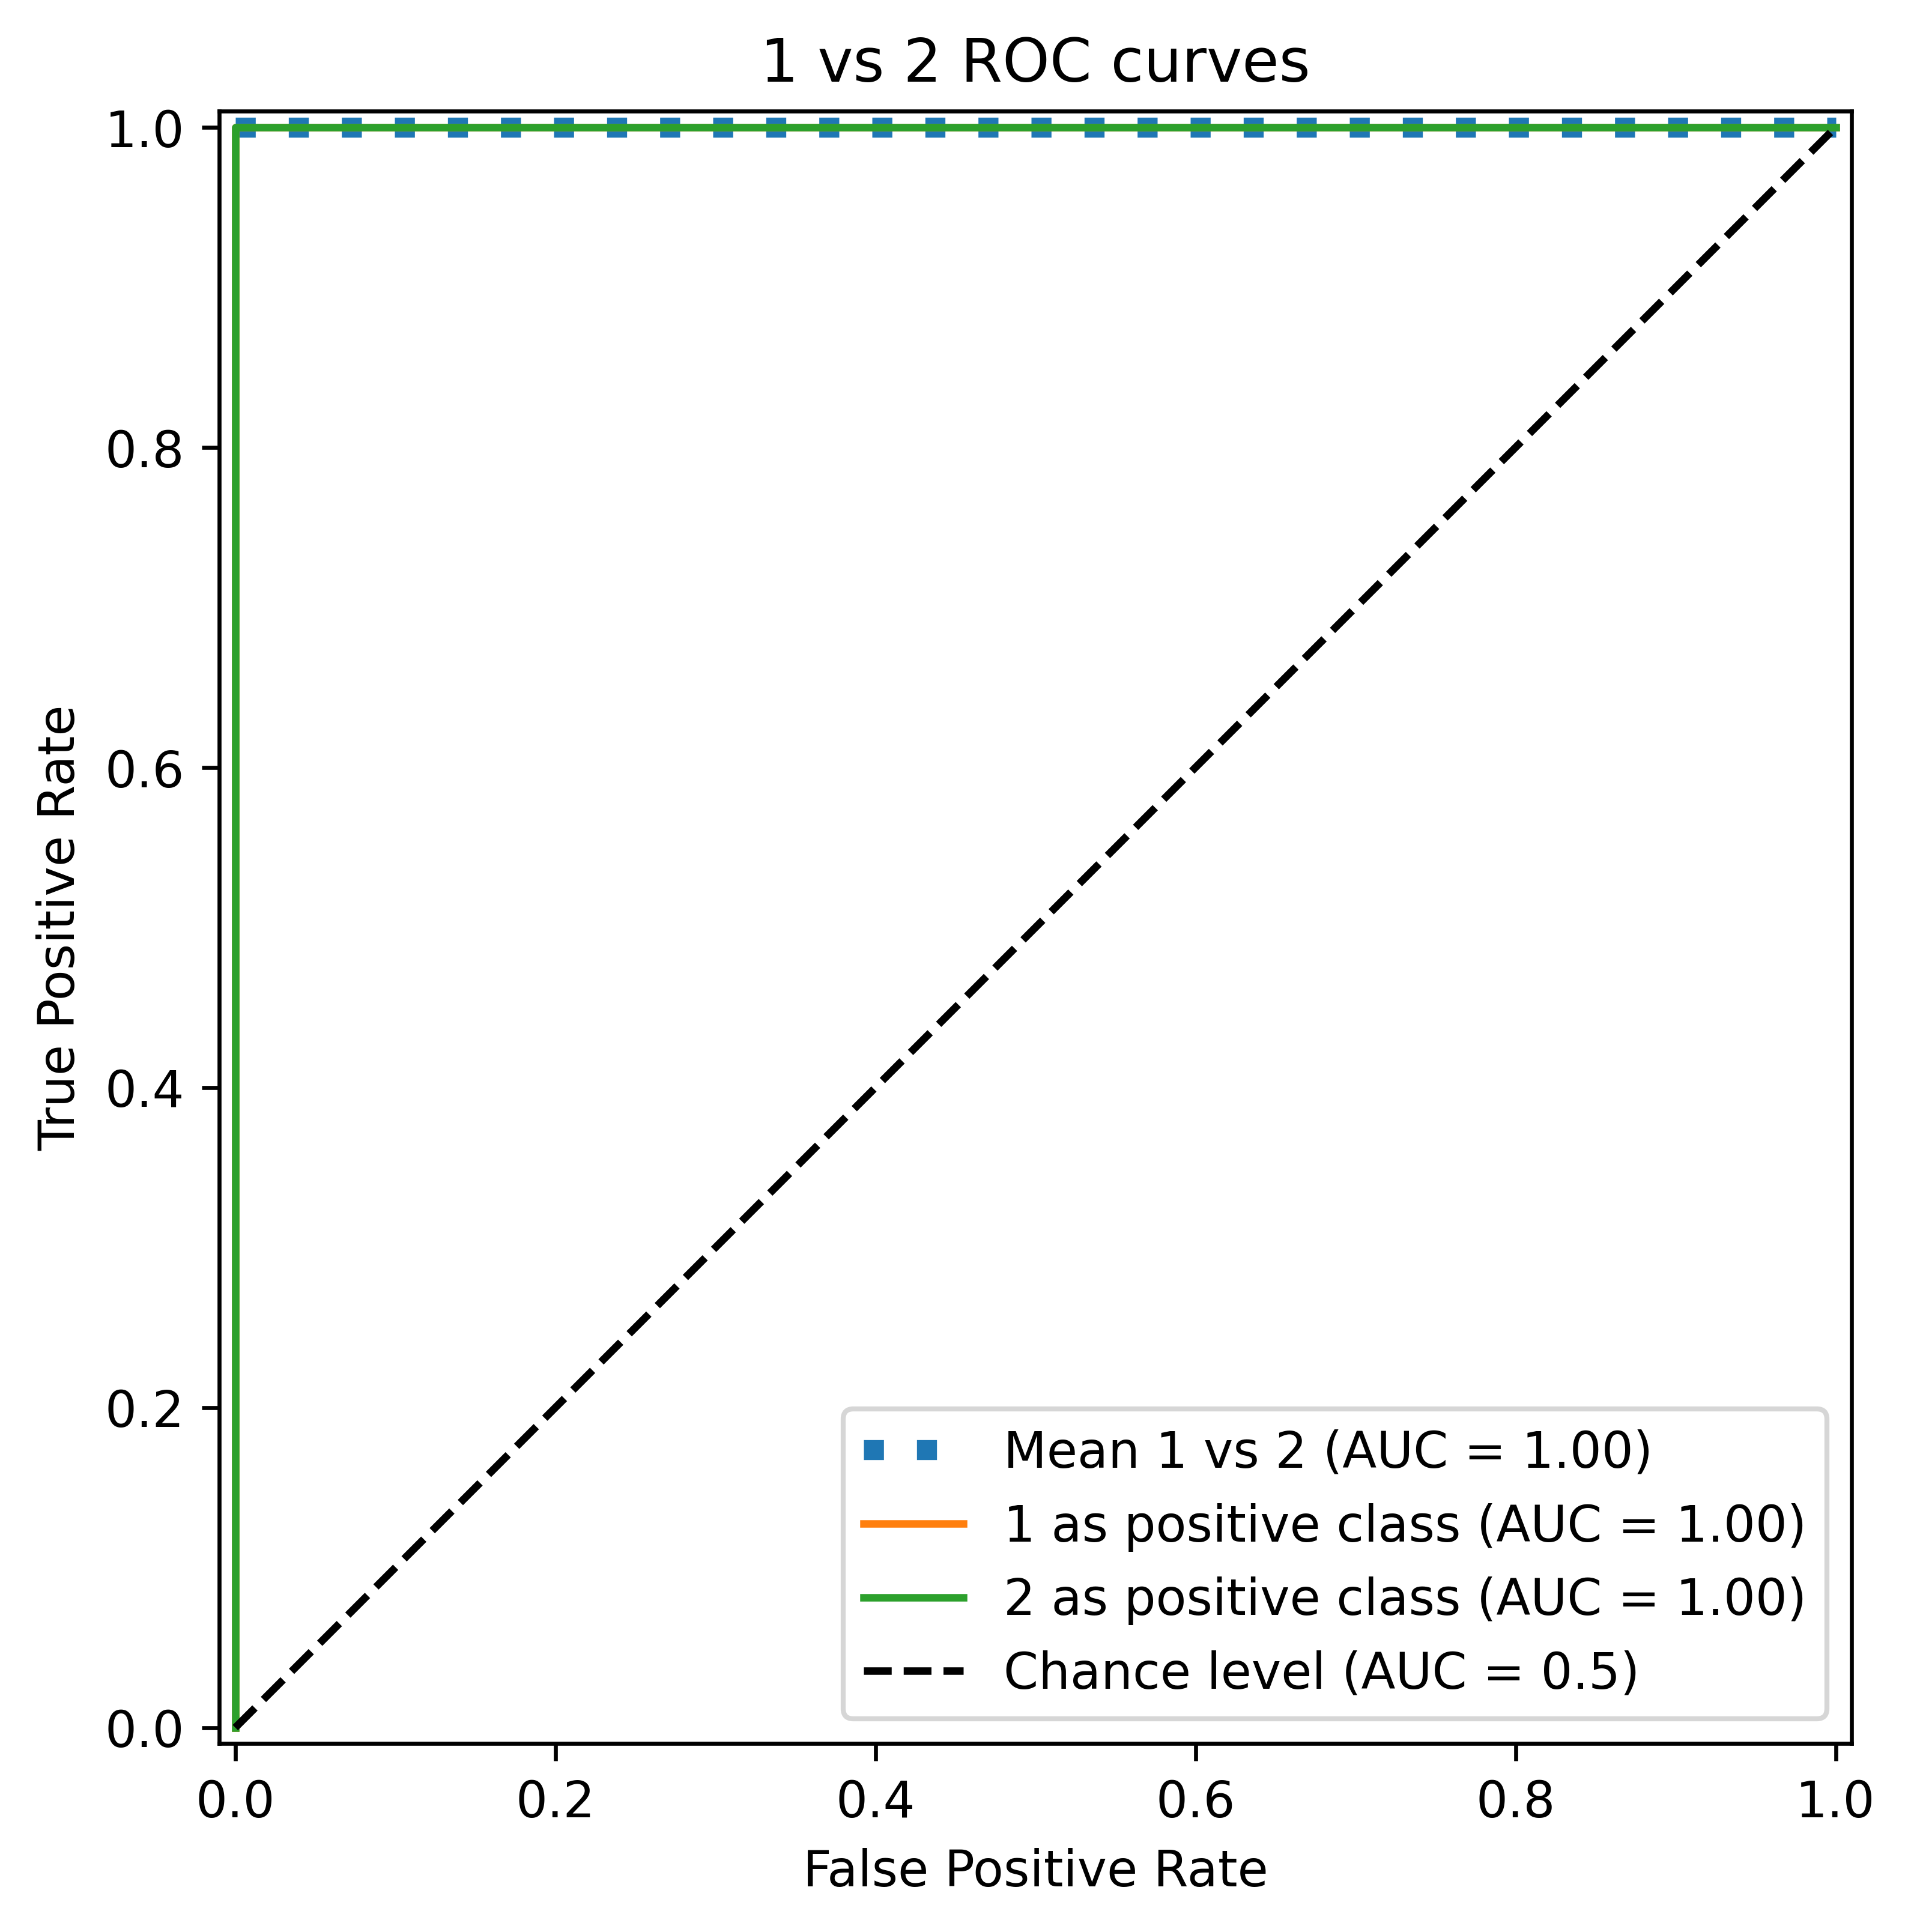

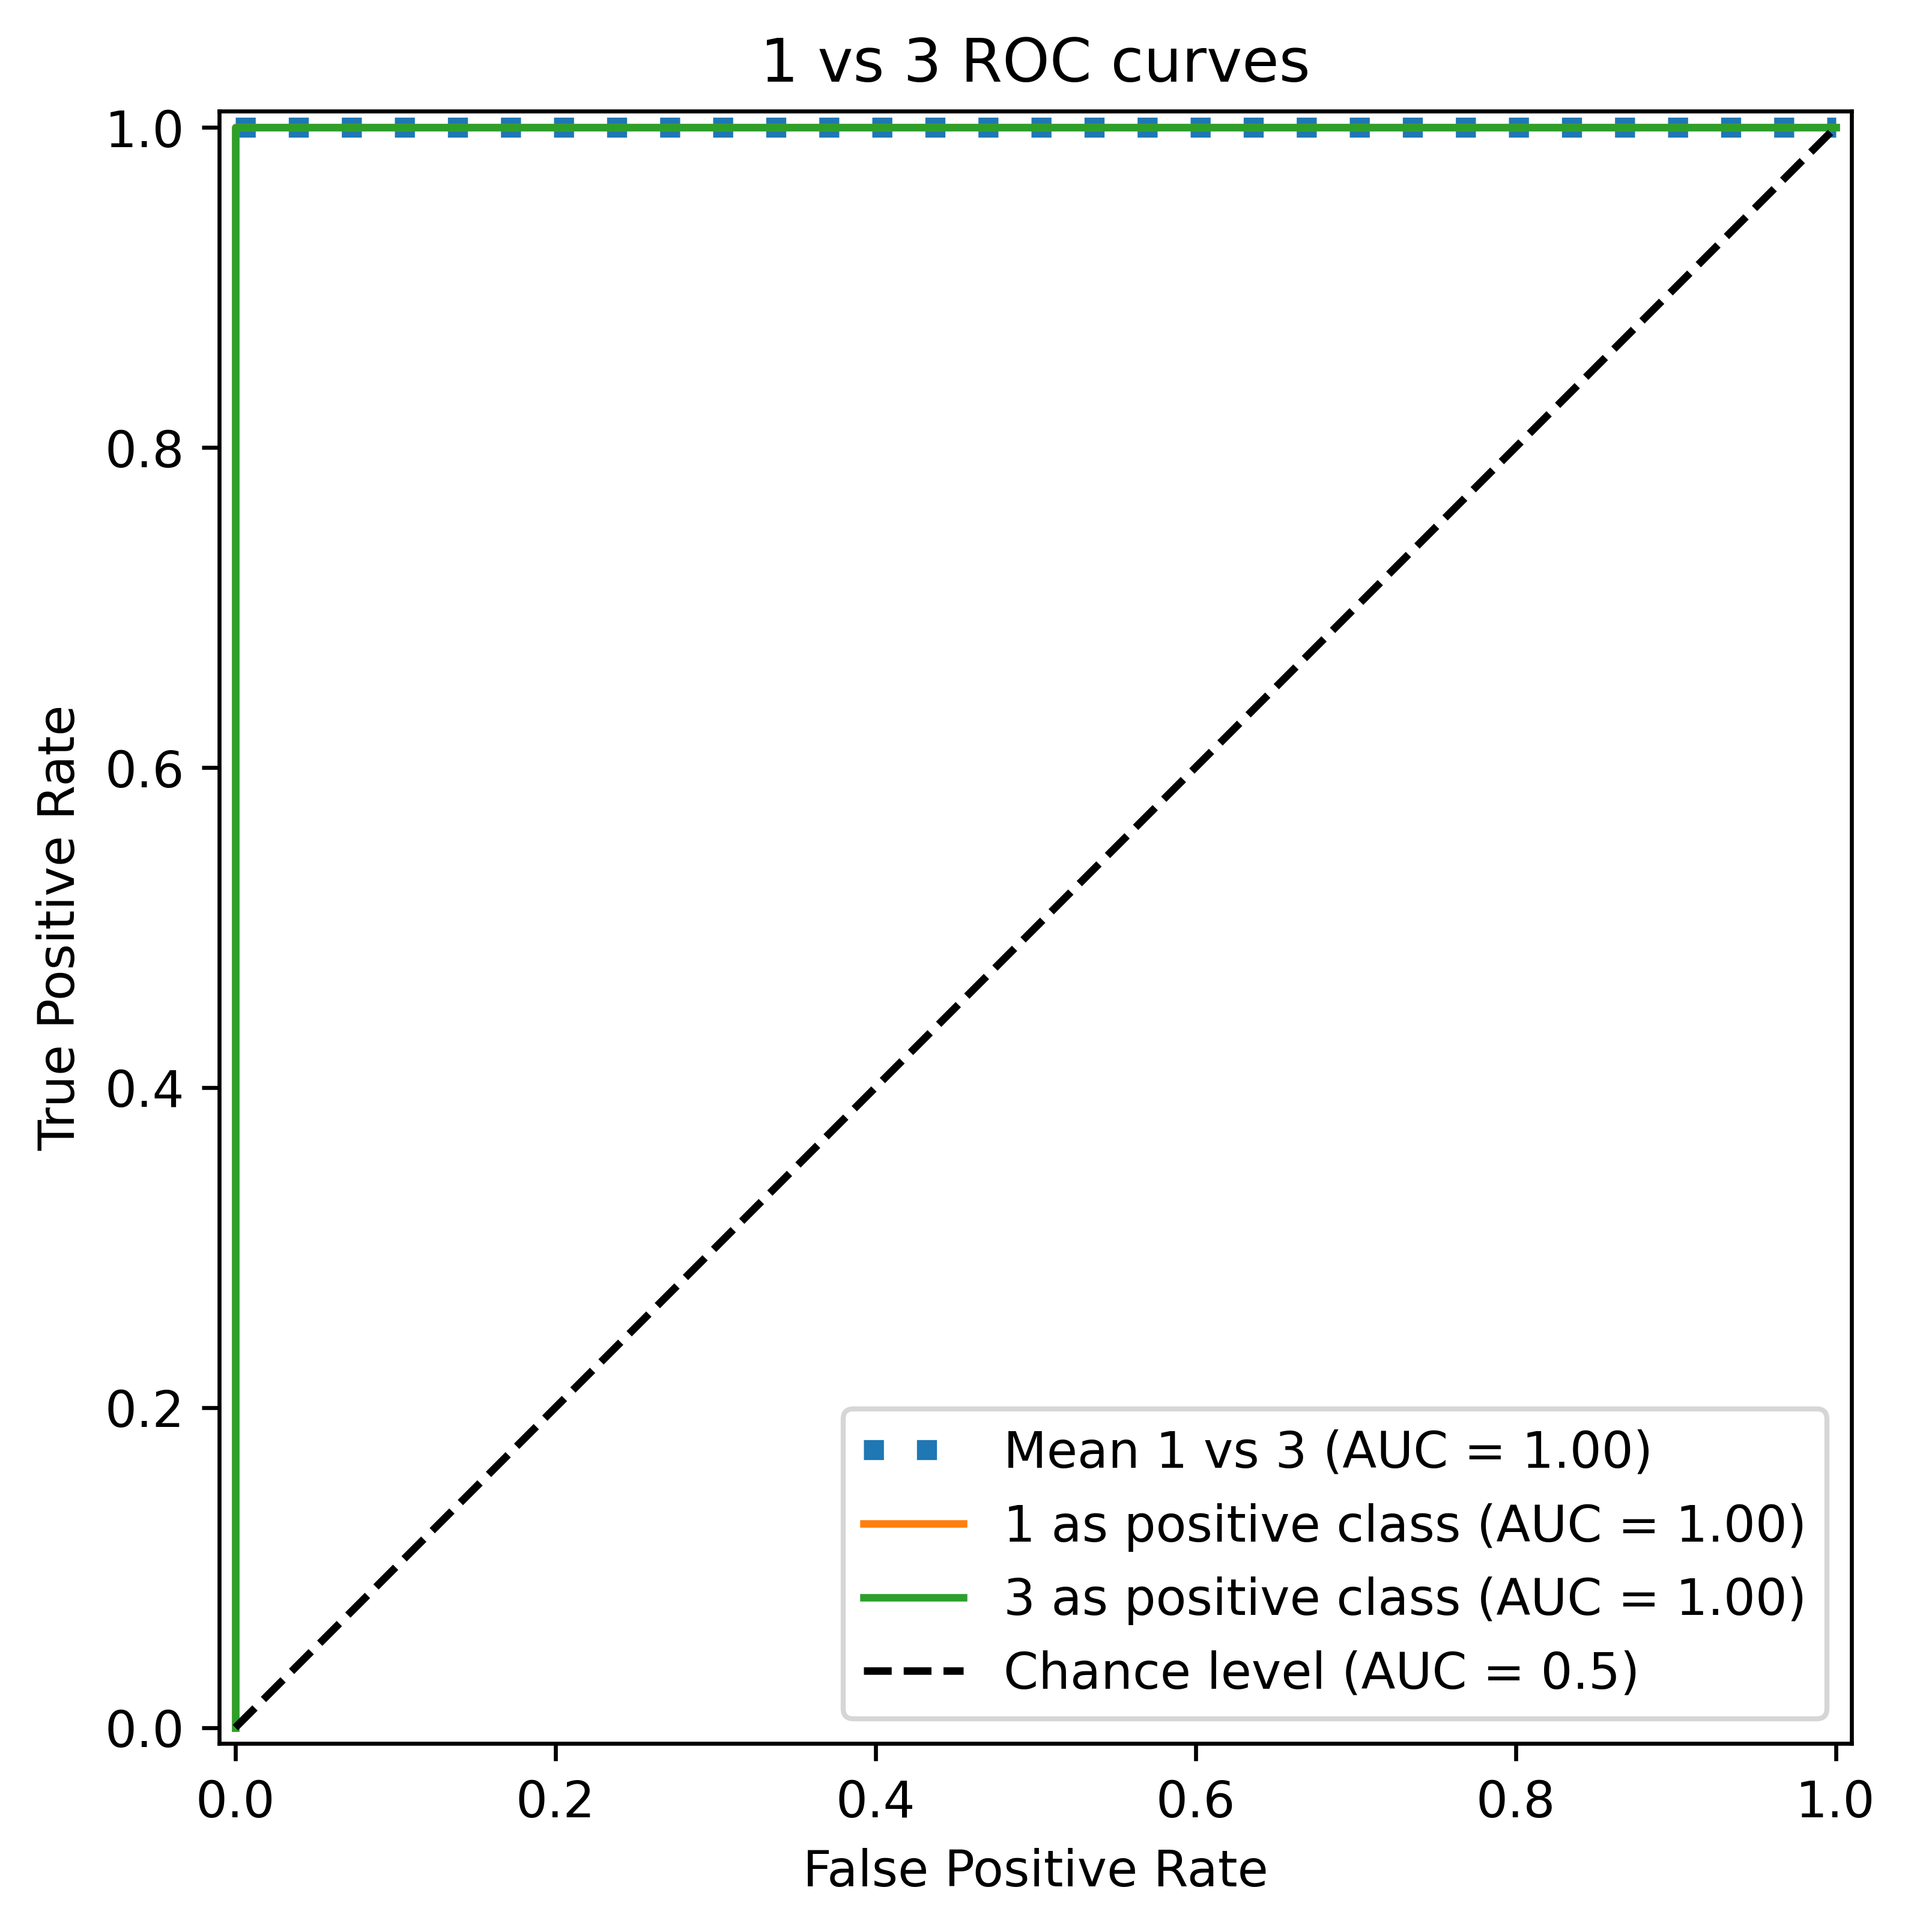

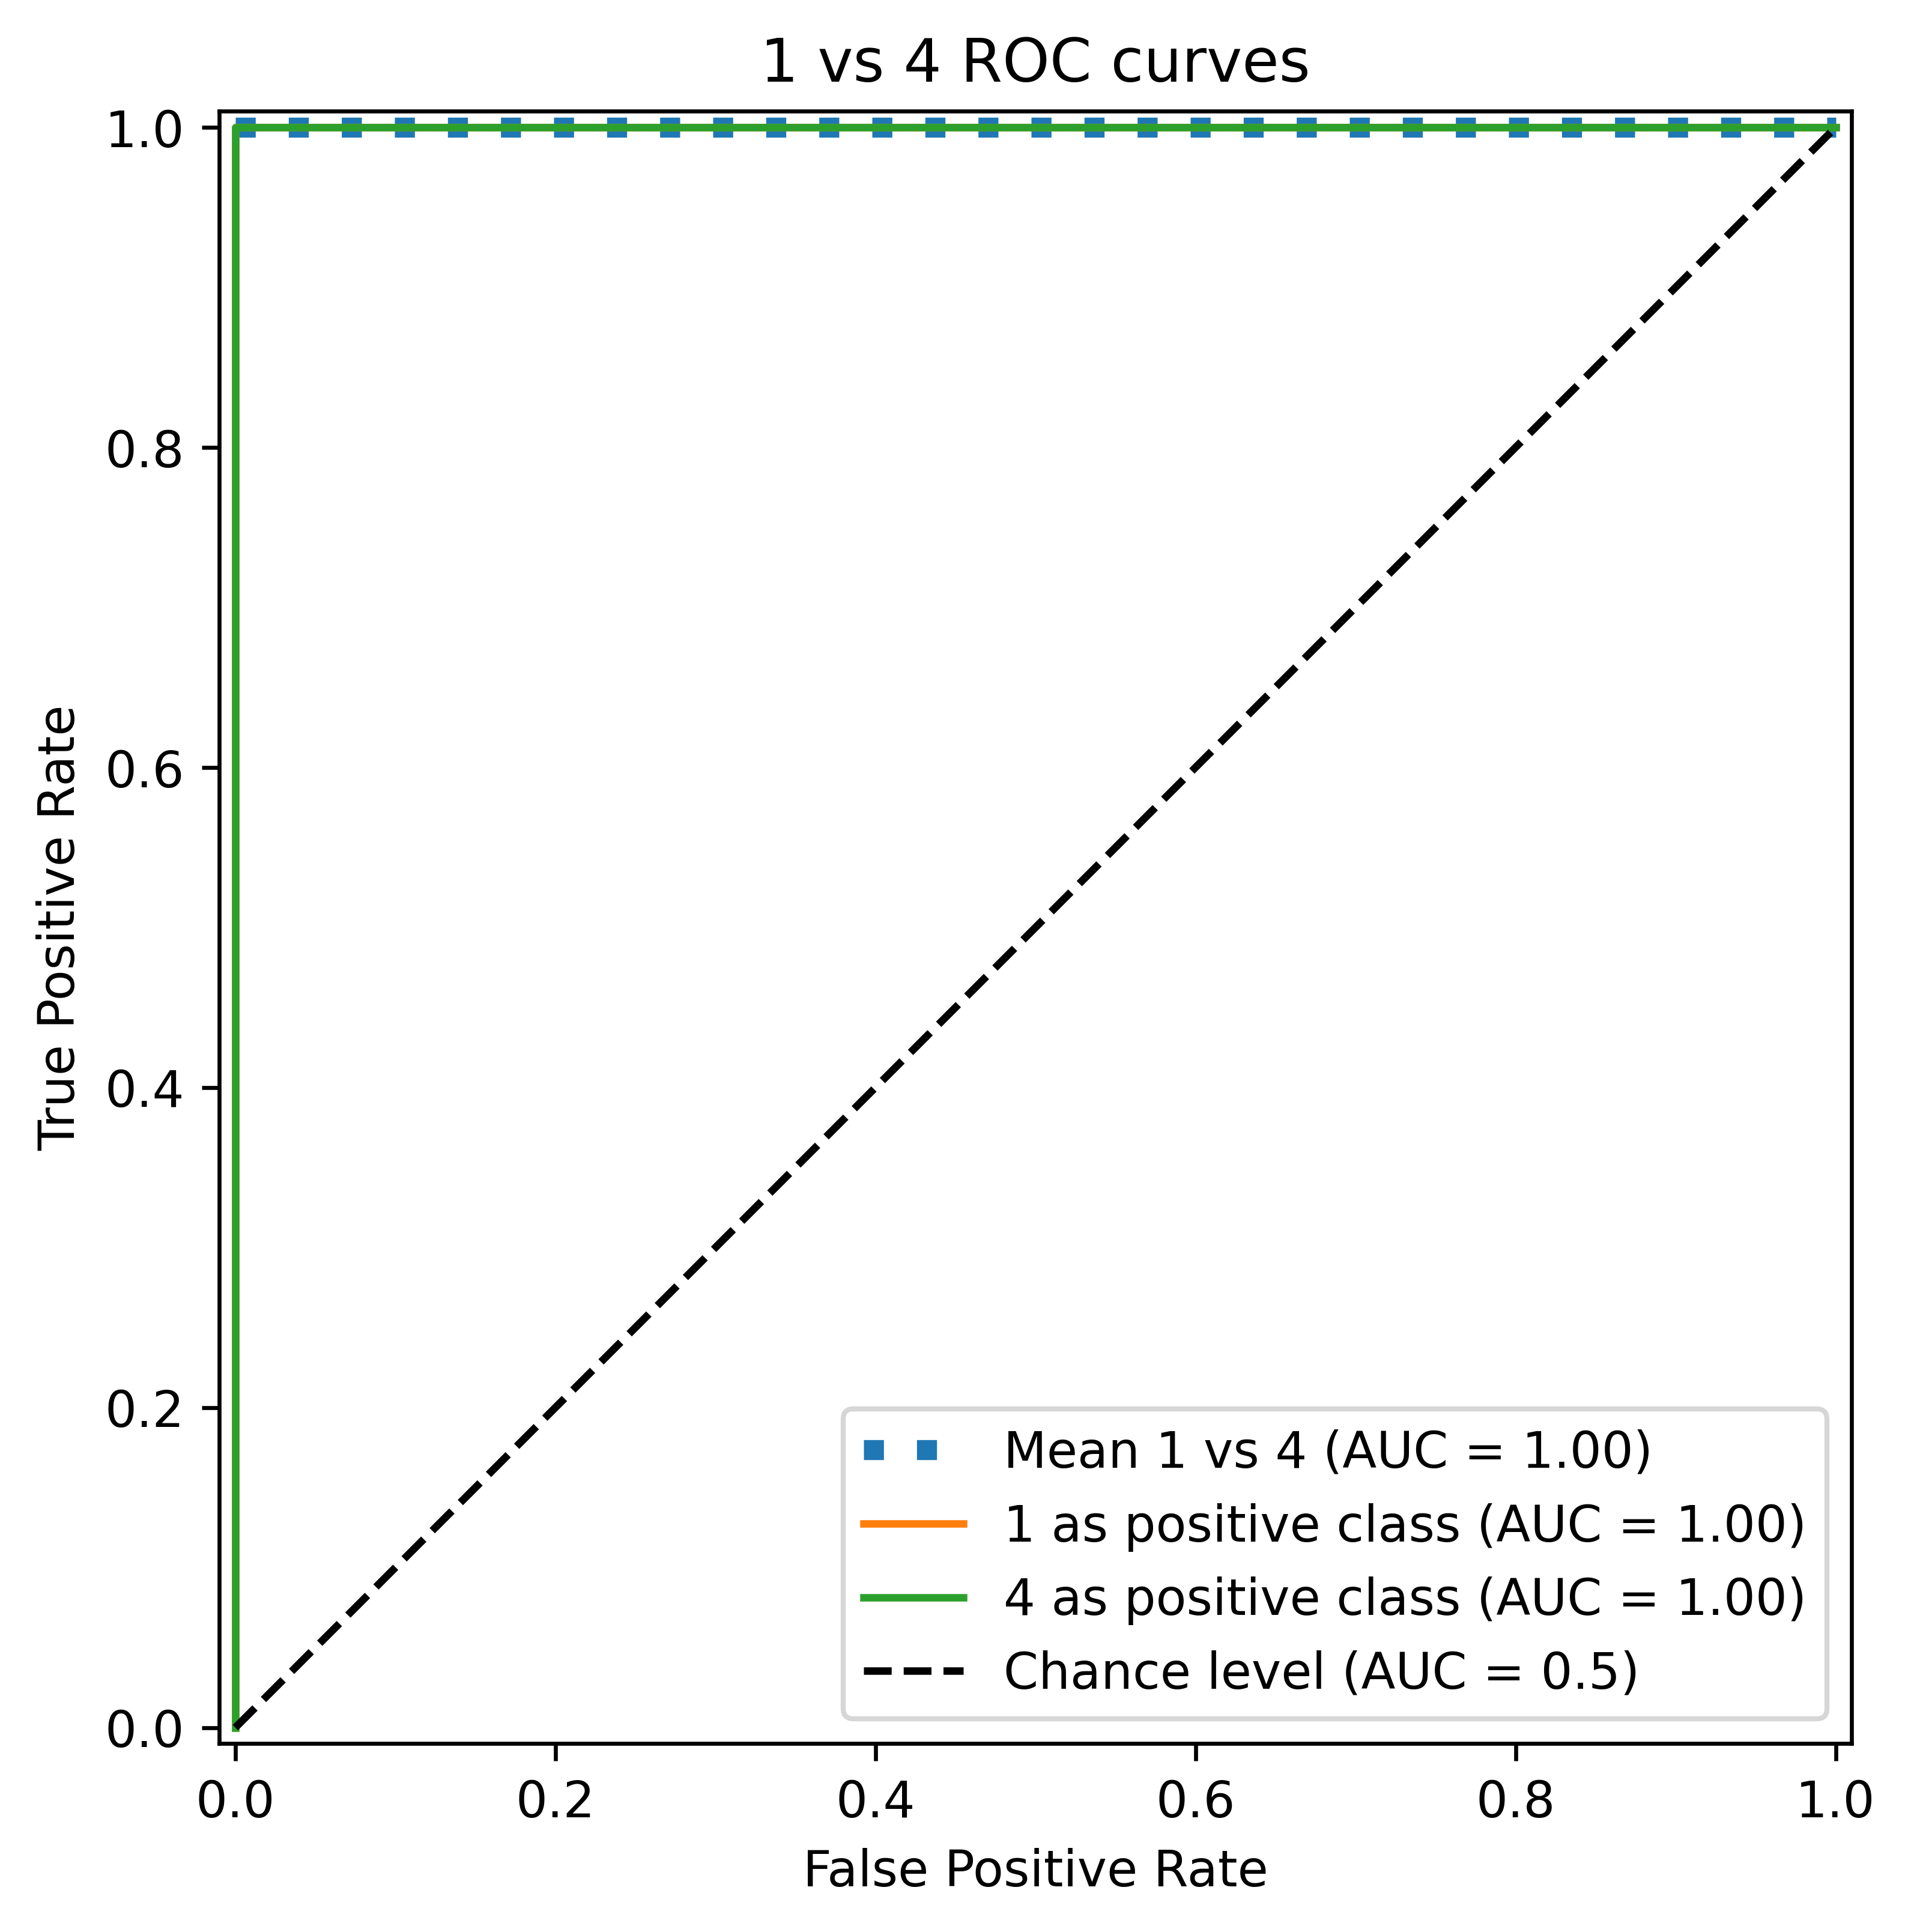

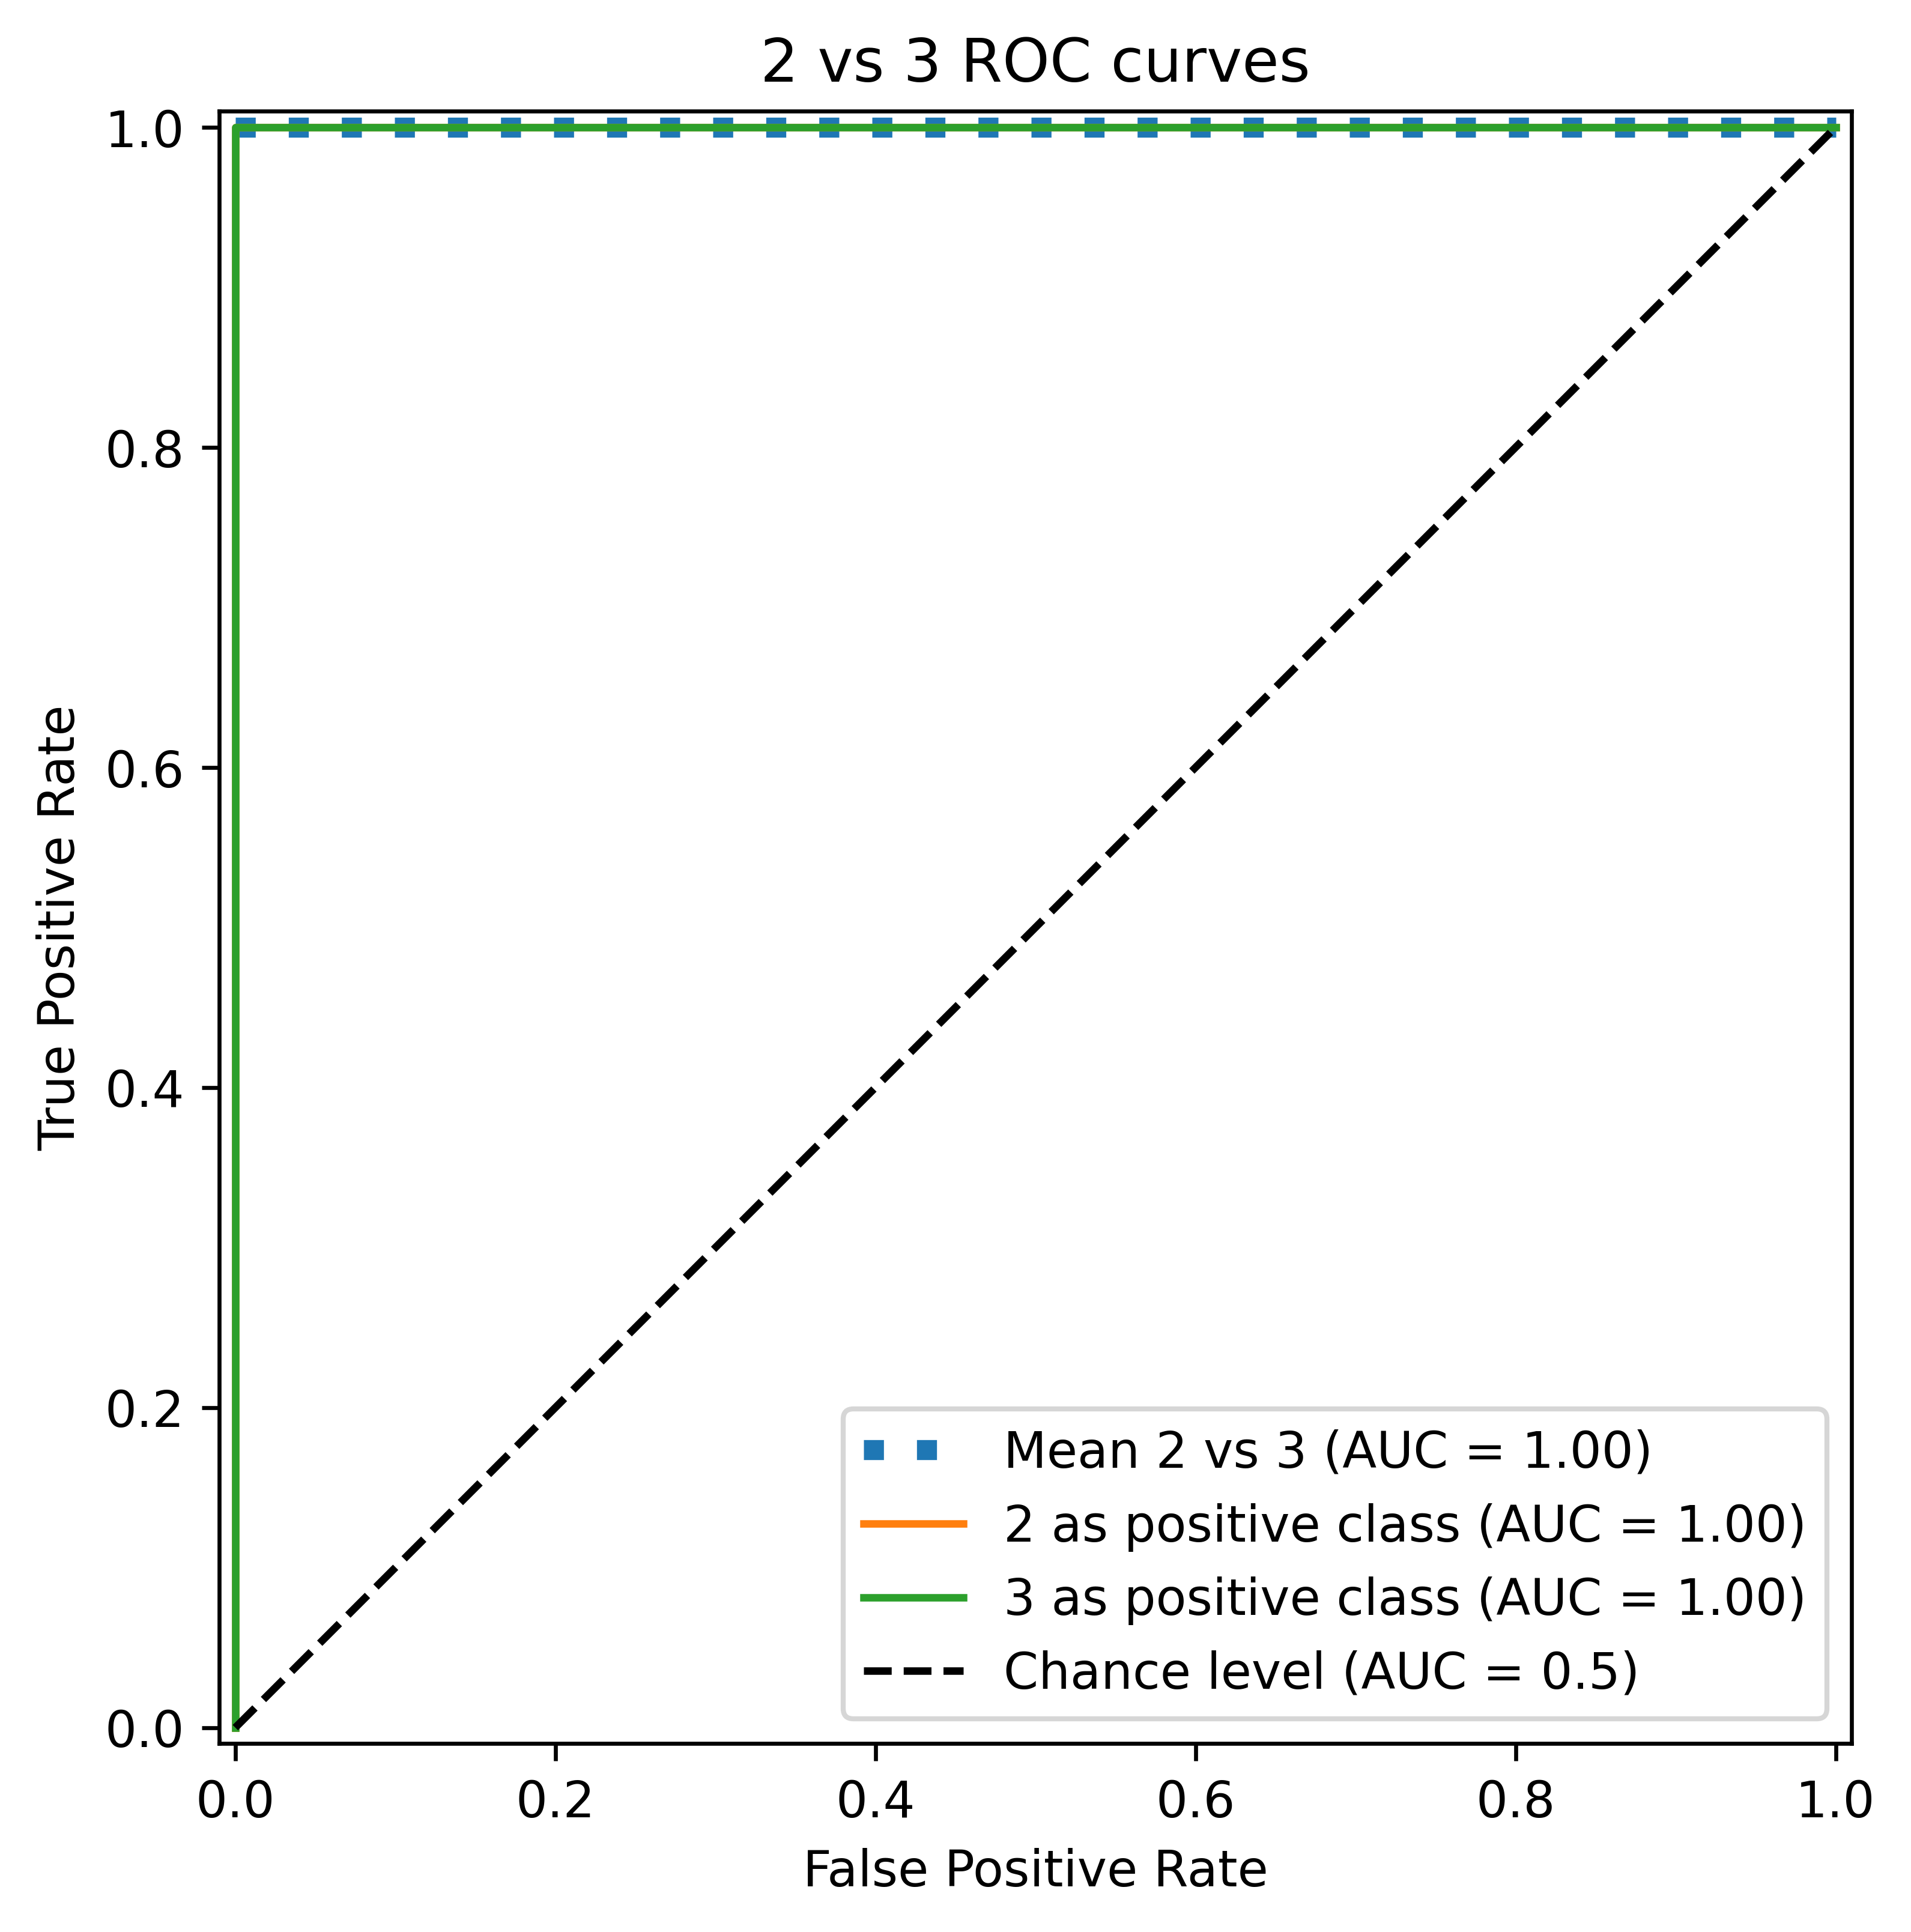

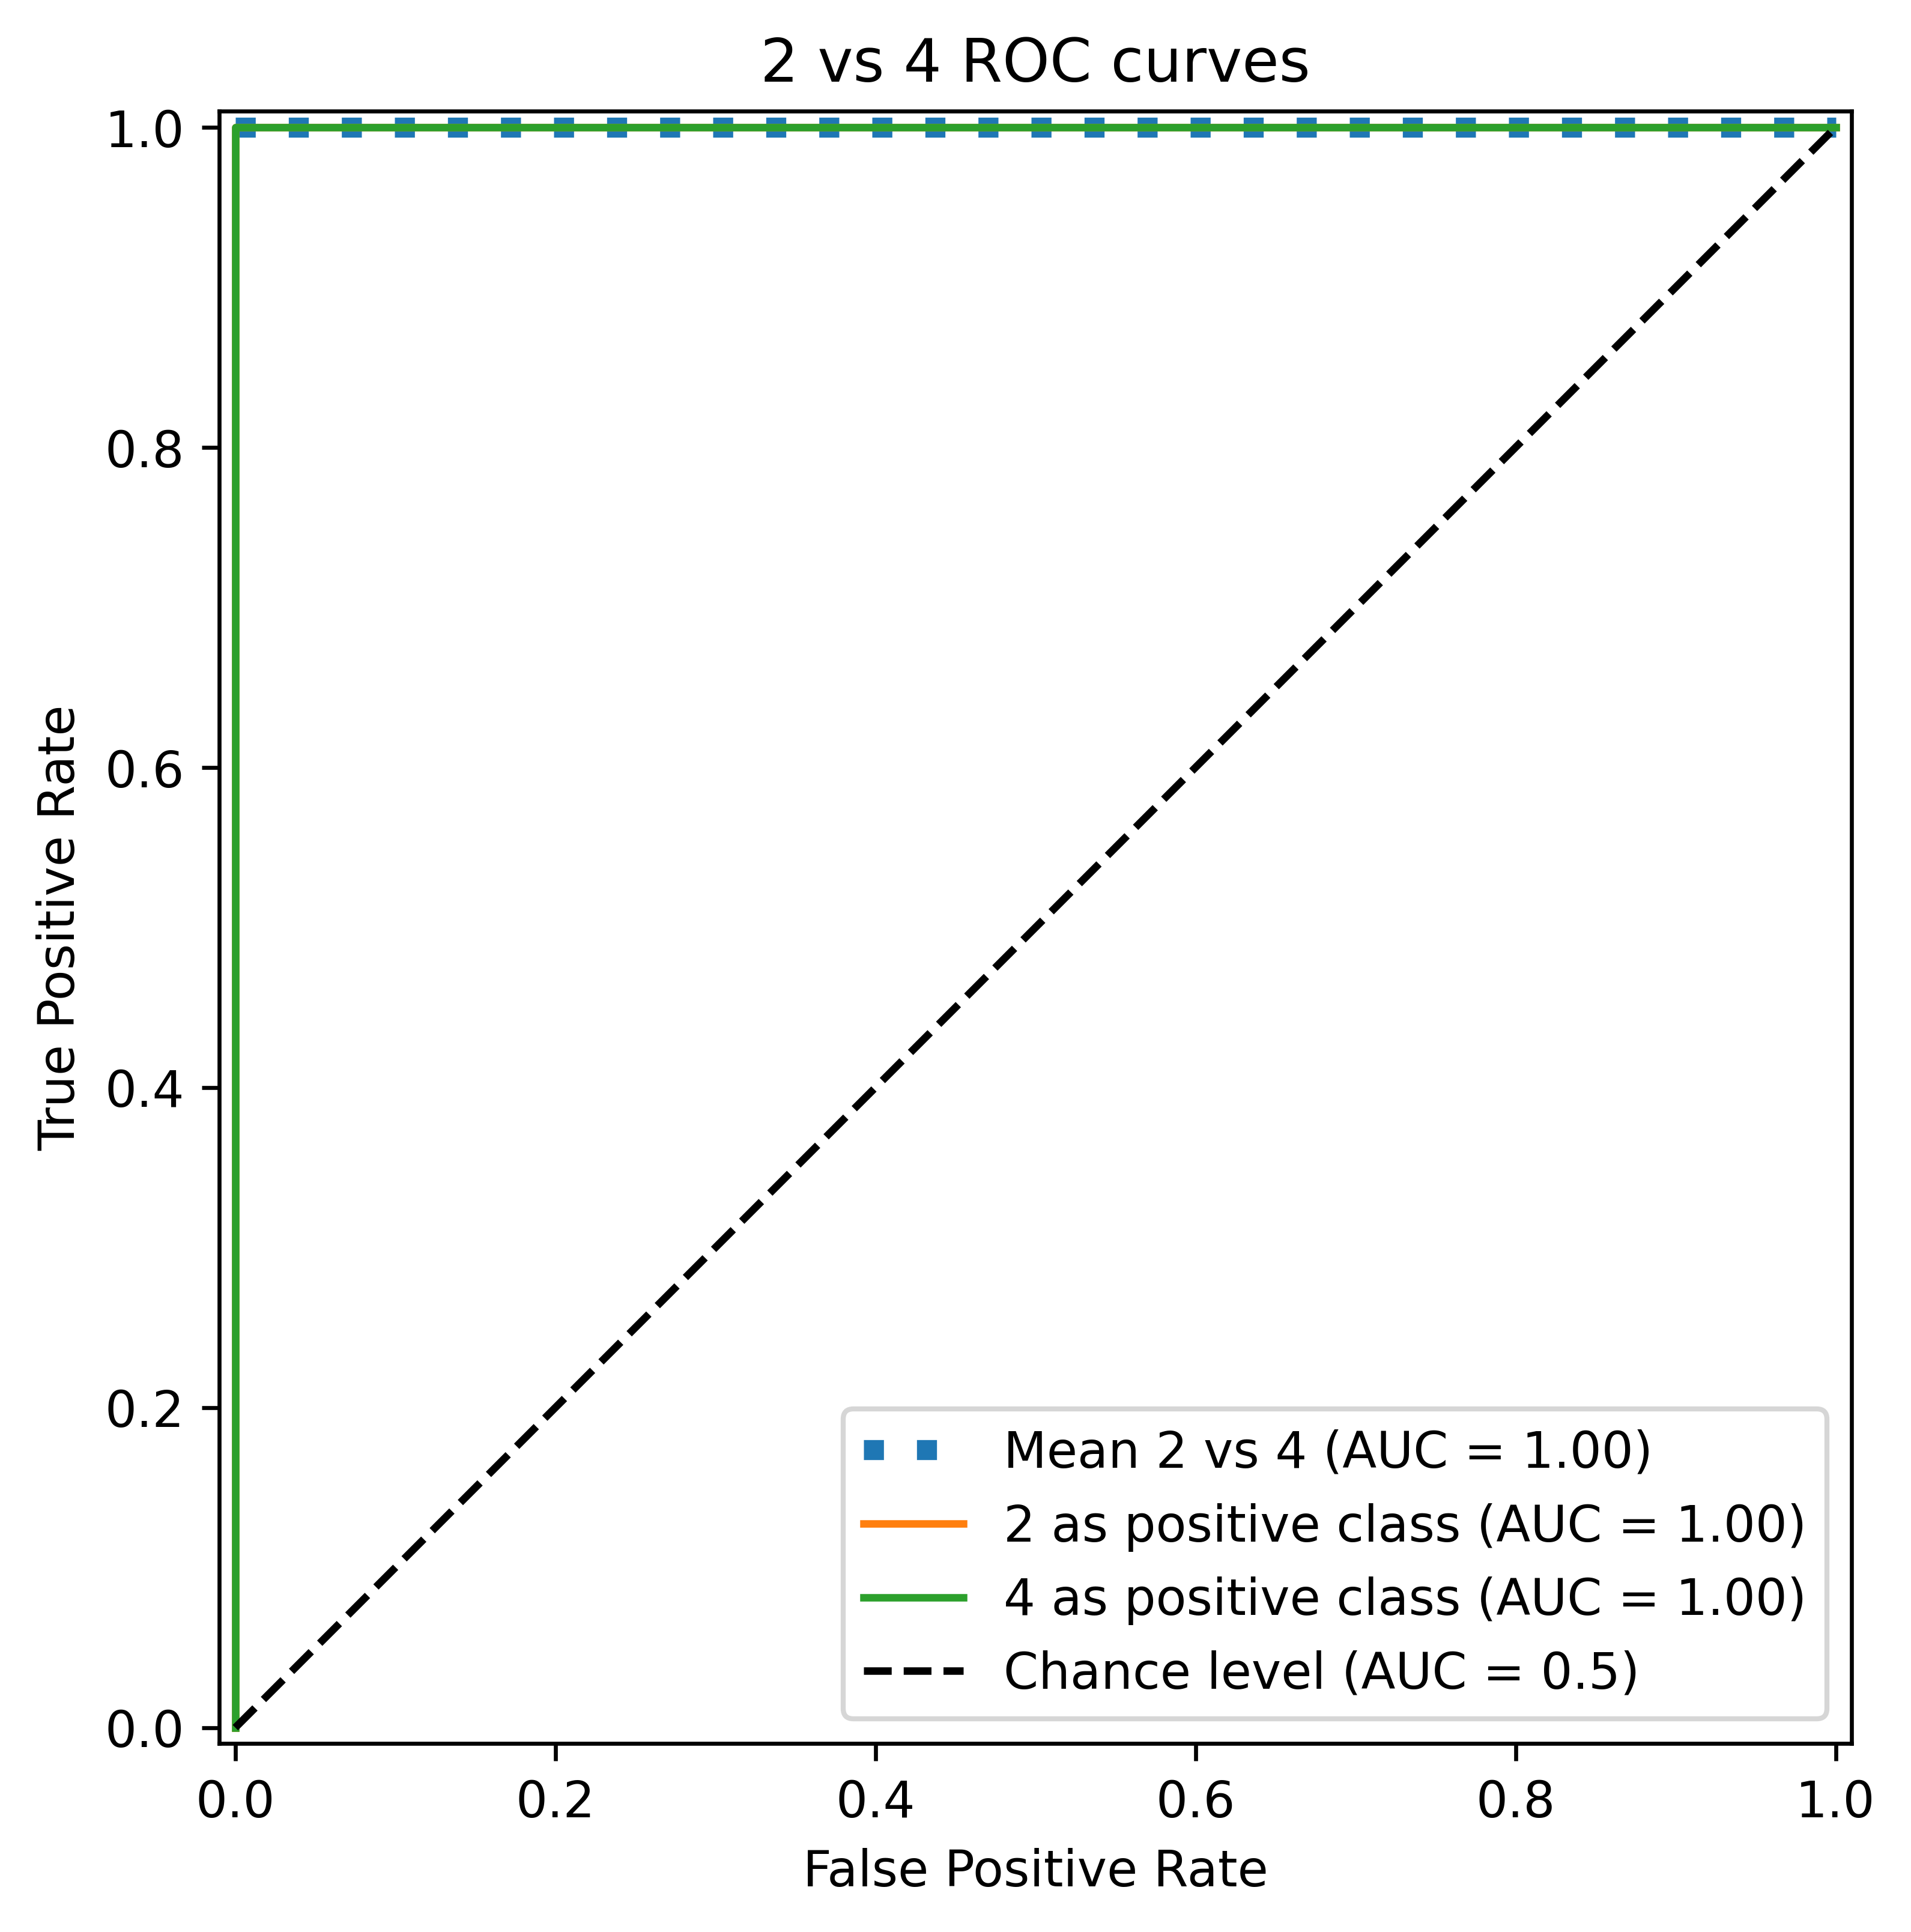

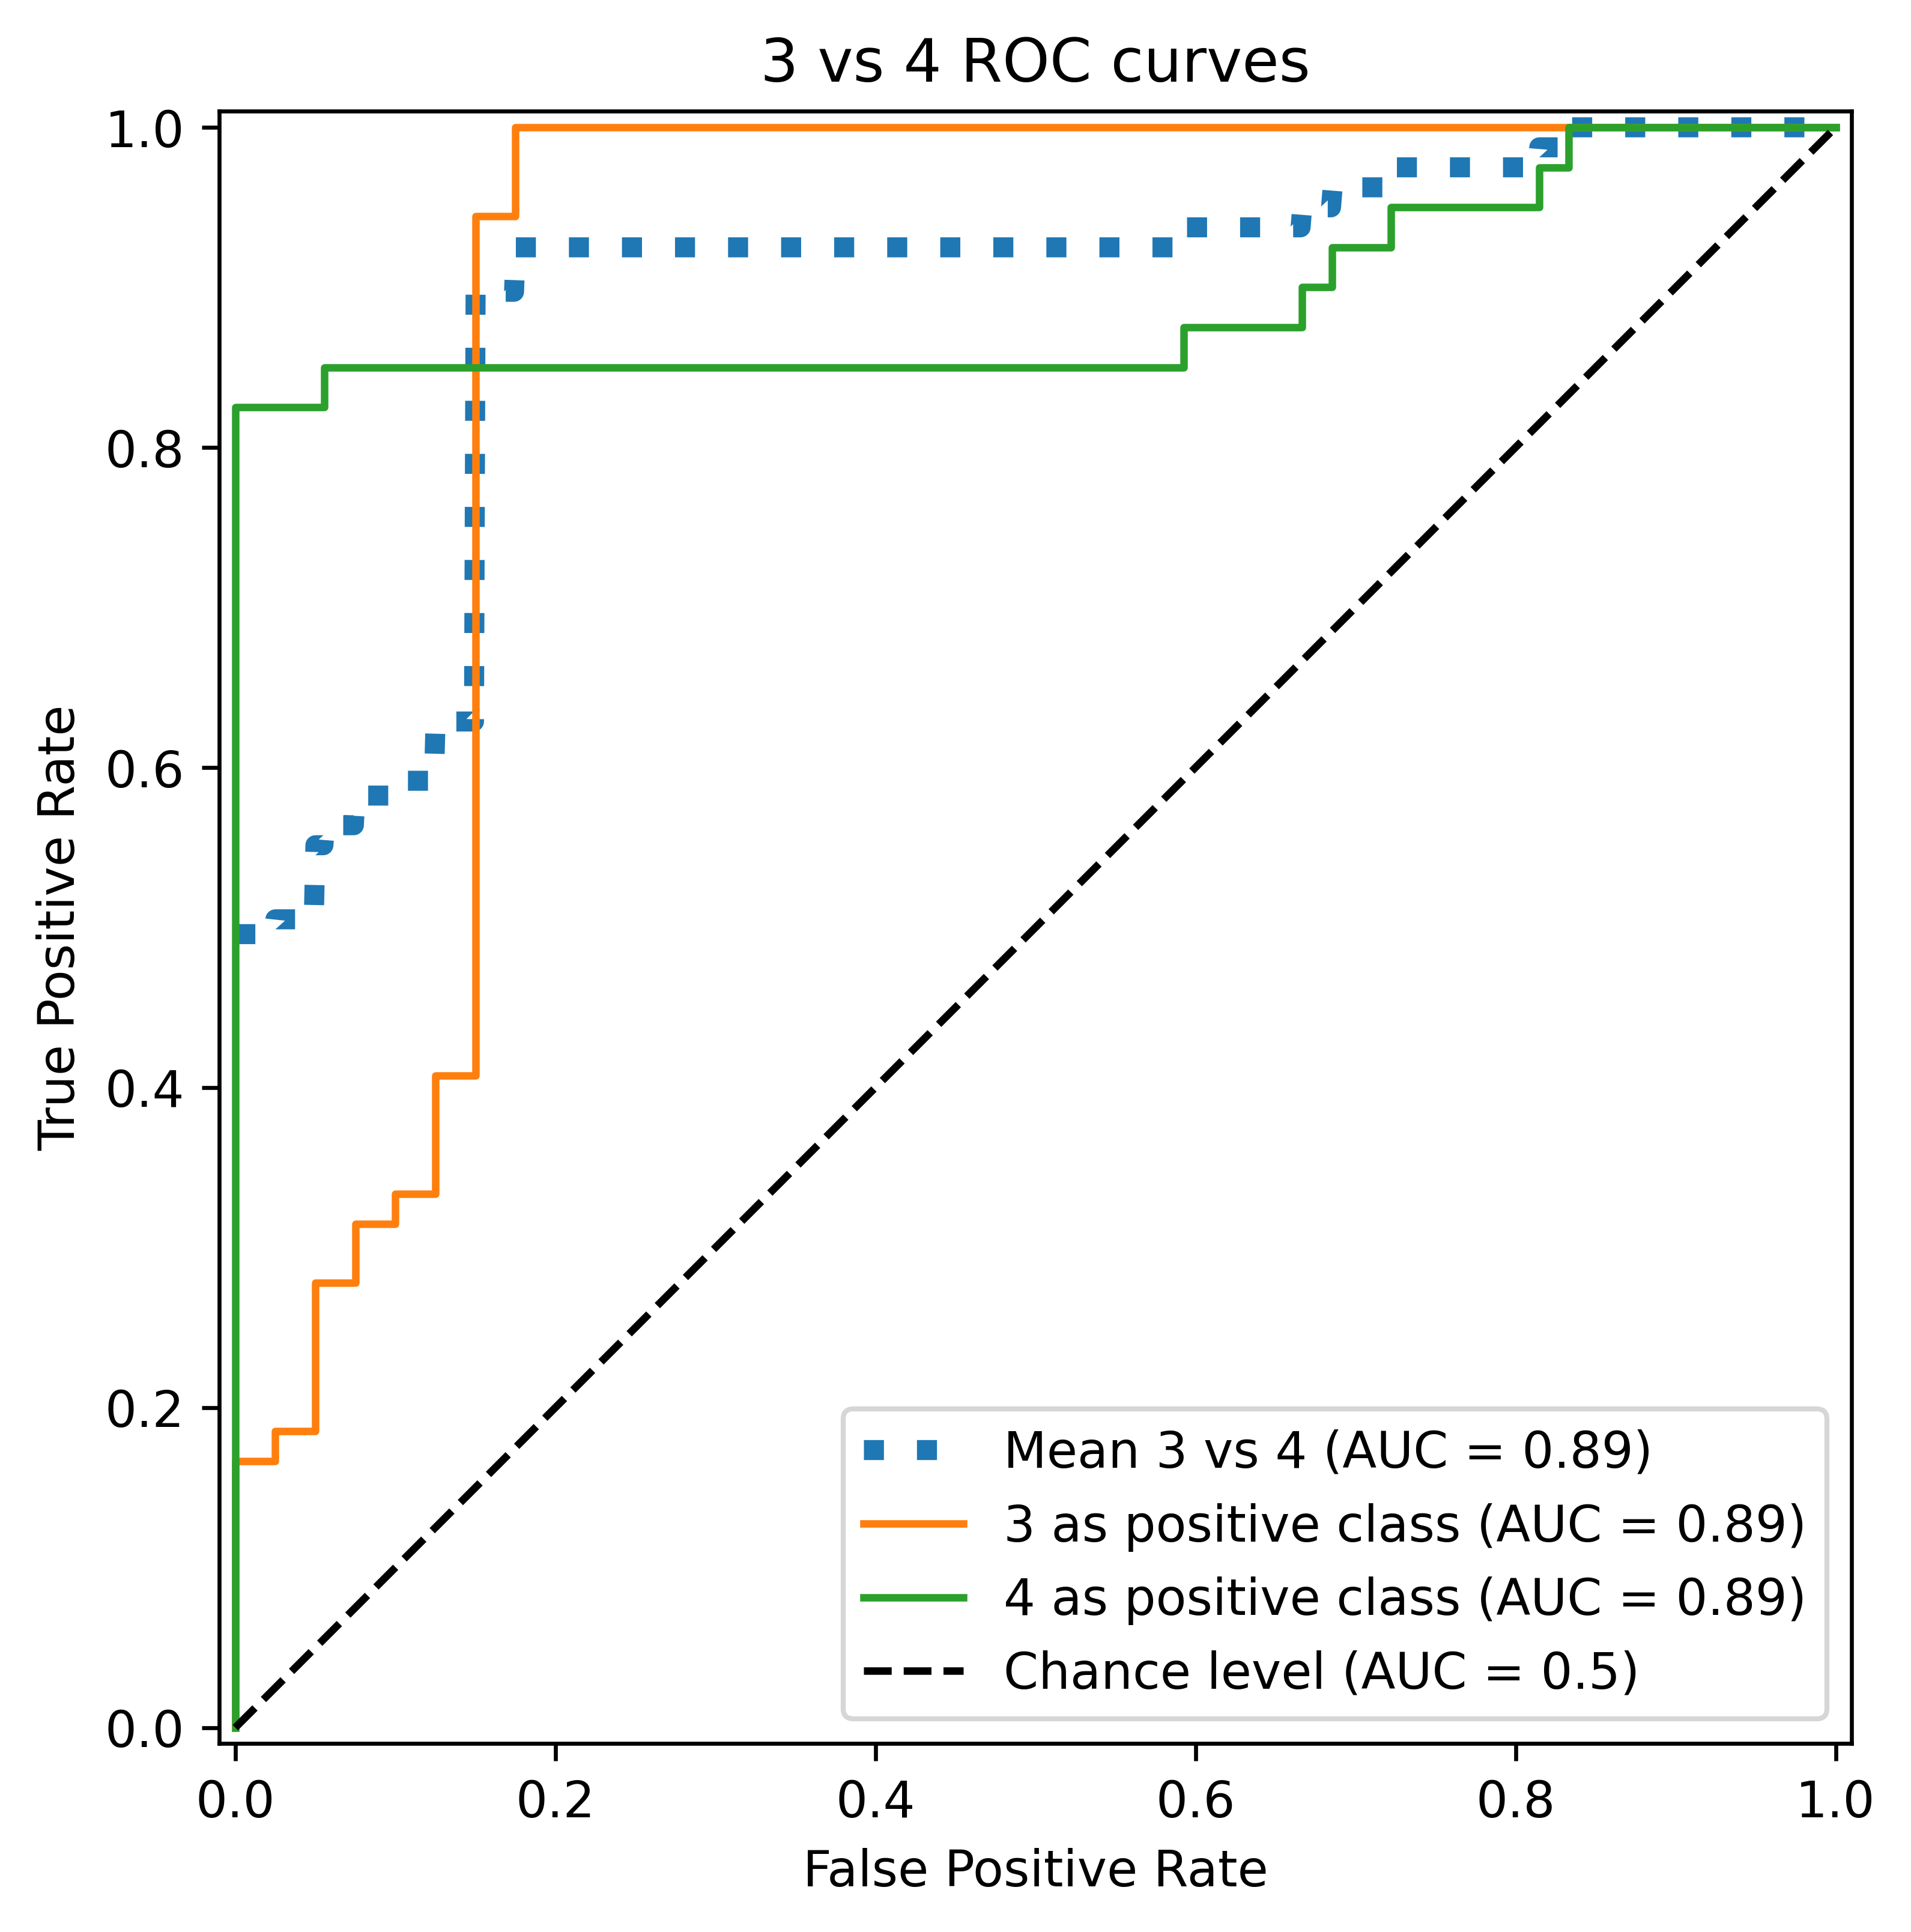

In [10]:
## From https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

fpr_grid = np.linspace(0.0, 1.0, 1000)
label_binarizer = LabelBinarizer().fit(y_train)

pair_scores = []
mean_tpr = dict()

for ix, (label_a, label_b) in enumerate(pair_list):
    a_mask = y_test == label_a
    b_mask = y_test == label_b
    ab_mask = np.logical_or(a_mask, b_mask)
    ab_mask = ab_mask.values.ravel()

    a_true = a_mask[ab_mask]
    b_true = b_mask[ab_mask]


    idx_a = np.flatnonzero(label_binarizer.classes_ == label_a)[0]
    idx_b = np.flatnonzero(label_binarizer.classes_ == label_b)[0]
#     print(ab_mask)
#     print(idx_a.size)

    fpr_a, tpr_a, _ = roc_curve(a_true, y_score[ab_mask, idx_a])
    fpr_b, tpr_b, _ = roc_curve(b_true, y_score[ab_mask, idx_b])

    mean_tpr[ix] = np.zeros_like(fpr_grid)
    mean_tpr[ix] += np.interp(fpr_grid, fpr_a, tpr_a)
    mean_tpr[ix] += np.interp(fpr_grid, fpr_b, tpr_b)
    mean_tpr[ix] /= 2
    mean_score = auc(fpr_grid, mean_tpr[ix])
    pair_scores.append(mean_score)

    fig, ax = plt.subplots(figsize=(6, 6), dpi=600)
    plt.plot(
        fpr_grid,
        mean_tpr[ix],
        label=f"Mean {label_a} vs {label_b} (AUC = {mean_score :.2f})",
        linestyle=":",
        linewidth=4,
    )
    RocCurveDisplay.from_predictions(
        a_true,
        y_score[ab_mask, idx_a],
        ax=ax,
        name=f"{label_a} as positive class",
    )
    RocCurveDisplay.from_predictions(
        b_true,
        y_score[ab_mask, idx_b],
        ax=ax,
        name=f"{label_b} as positive class",
        plot_chance_level=True,
    )
    ax.set(
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title=f"{idx_a+1} vs {label_b} ROC curves",
    )
#     plt.savefig("ScatterplotTime.jpg", format='jpg', dpi=1200, bbox_inches='tight')

print(f"Macro-averaged One-vs-One ROC AUC score:\n{np.average(pair_scores):.2f}")

In [11]:
## Adapted from https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

macro_roc_auc_ovo = roc_auc_score(
    y_test.values.ravel(),
    y_score,
    multi_class="ovo",
    average="macro",
)

print(f"Macro-averaged One-vs-One ROC AUC score:\n{macro_roc_auc_ovo:.2f}")

Macro-averaged One-vs-One ROC AUC score:
0.98


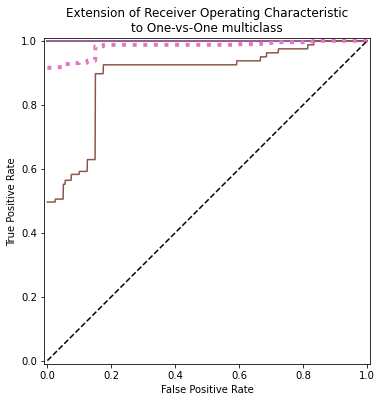

In [12]:
## Adapted from https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

ovo_tpr = np.zeros_like(fpr_grid)

fig, ax = plt.subplots(figsize=(6, 6))
for ix, (label_a, label_b) in enumerate(pair_list):
    ovo_tpr += mean_tpr[ix]
    ax.plot(
        fpr_grid,
        mean_tpr[ix],
        label=f"Mean {label_a} vs {label_b} (AUC = {pair_scores[ix]:.2f})",
    )

ovo_tpr /= sum(1 for pair in enumerate(pair_list))

ax.plot(
    fpr_grid,
    ovo_tpr,
    label=f"One-vs-One macro-average (AUC = {macro_roc_auc_ovo:.2f})",
    linestyle=":",
    linewidth=4,
)
ax.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)")
_ = ax.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Extension of Receiver Operating Characteristic\nto One-vs-One multiclass",
    aspect="equal",
    xlim=(-0.01, 1.01),
    ylim=(-0.01, 1.01),
)

# Support Vector Machine Classification:

In [13]:
## Defining the pairwise ROC and AUC function for SVM:

def PairwiseROC(x,y,Z):
    Testing_pairwise = pd.DataFrame()
    Testing_pairwise['Truth']=(Z['Truth'][((Z['Truth']==x) | (Z['Truth']==y))
                                          & ((Z['Predict']==x) | (Z['Predict']==y))])
    Testing_pairwise['Predict']=(Z['Predict'][((Z['Truth']==x) | (Z['Truth']==y))
                                              & ((Z['Predict']==x) | (Z['Predict']==y))])
    Testing_pairwise
    fpr, tpr, threshold = roc_curve(Testing_pairwise['Truth'],
                                    Testing_pairwise['Predict'], pos_label=y)
    roc_auc = auc(fpr, tpr)
    print('AUC=', roc_auc)
    plt.plot(fpr, tpr, label=str(x)+' with '+str(y))


## Radial Kernel SVM:

In [14]:
## Radial Kernel SVM:
## Adapted from https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html

clf2 = OneVsOneClassifier(
         SVC(kernel='rbf', random_state=0)).fit(X_train, y_train.values.ravel())
y_predict = clf2.predict(X_test)

In [15]:
Testing_rbf = pd.DataFrame()

Testing_rbf['Truth'] = y_test
Testing_rbf['Predict'] = y_predict
Testing_rbf

,Truth,Predict
141,2,2
142,2,2
274,3,4
60,1,1
303,4,4
...,...,...
166,2,2
281,4,4
366,4,4
230,3,4


In [16]:
len(Testing_rbf.query('Truth==Predict'))

132

In [17]:
print(len(Testing_rbf[(Testing_rbf['Truth']==3)]))

print(len(Testing_rbf[(Testing_rbf['Truth']==3) & (Testing_rbf['Predict']==4)]))

print('All China data is misclassified as Russia!!')

## All China data is misclassified as Russia!! 

54
54
All China data is misclassified as Russia!!


AUC= 1.0
AUC= nan
AUC= 1.0
AUC= nan
AUC= 1.0
AUC= 0.5


C:\Users\Andre\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Andre\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


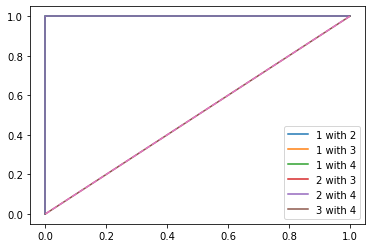

Radial SVM for CN with RU is useless classifier (AUC=0.5).


In [18]:
x_points=[0,1]
y_points=[0,1]

PairwiseROC(1,2,Testing_rbf)
PairwiseROC(1,3,Testing_rbf)
PairwiseROC(1,4,Testing_rbf)
PairwiseROC(2,3,Testing_rbf)
PairwiseROC(2,4,Testing_rbf)
PairwiseROC(3,4,Testing_rbf)
plt.legend()
plt.plot(x_points, y_points, '--')
# plt.savefig("ROC_rbf.jpg", format='jpg', dpi=1200, bbox_inches='tight')
plt.show()



print('Radial SVM for CN with RU is useless classifier (AUC=0.5).')



Now that we have run the Radial Kernel SVM for the default regularization parameter value *C*, we now check whether the ROC and AUC curves show a classification improvement if we change the regularization parameter value. For this, we take $C=0.1, 10, 50, \text{ and } 100$, and run the radial kernel classification for these values of *C*. 

In [19]:
clf_c1 = OneVsOneClassifier(
         SVC(kernel='rbf', C=0.1, random_state=0)).fit(X_train, y_train.values.ravel())
y_predict_c1 = clf_c1.predict(X_test)

In [20]:
Testing_rbf_c1 = pd.DataFrame()

Testing_rbf_c1['Truth'] = y_test
Testing_rbf_c1['Predict'] = y_predict_c1
Testing_rbf_c1

,Truth,Predict
141,2,2
142,2,2
274,3,4
60,1,1
303,4,4
...,...,...
166,2,2
281,4,4
366,4,4
230,3,4


In [21]:
len(Testing_rbf_c1.query('Truth==Predict'))

132

AUC= 1.0
AUC= nan
AUC= 1.0
AUC= nan
AUC= 1.0
AUC= 0.5


C:\Users\Andre\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Andre\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


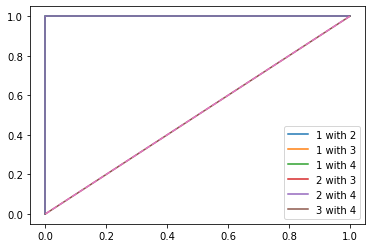

In [22]:
x_points=[0,1]
y_points=[0,1]

PairwiseROC(1,2,Testing_rbf_c1)
PairwiseROC(1,3,Testing_rbf_c1)
PairwiseROC(1,4,Testing_rbf_c1)
PairwiseROC(2,3,Testing_rbf_c1)
PairwiseROC(2,4,Testing_rbf_c1)
PairwiseROC(3,4,Testing_rbf_c1)
plt.legend()
plt.plot(x_points, y_points, '--')
# plt.savefig("ROC_rbf.jpg", format='jpg', dpi=1200, bbox_inches='tight')
plt.show()



# print('Radial SVM for CN with RU is useless classifier (AUC=0.5).')

As can be seen, setting a regularization parameter value $C=0.1$ yields the same ROC and AUC values as for the default regularization parameter value. Hence, we now run the code for the regularization parameter value $C=10$. 

In [23]:
clf_c2 = OneVsOneClassifier(
         SVC(kernel='rbf', C=10, random_state=0)).fit(X_train, y_train.values.ravel())
y_predict_c2 = clf_c2.predict(X_test)

In [24]:
Testing_rbf_c2 = pd.DataFrame()

Testing_rbf_c2['Truth'] = y_test
Testing_rbf_c2['Predict'] = y_predict_c2
Testing_rbf_c2

,Truth,Predict
141,2,2
142,2,2
274,3,3
60,1,1
303,4,4
...,...,...
166,2,2
281,4,4
366,4,4
230,3,4


In [25]:
len(Testing_rbf_c2.query('Truth==Predict'))

149

In [26]:
print('CN classified as RU:', len(Testing_rbf_c2[(Testing_rbf_c2['Truth']==3) & (Testing_rbf_c2['Predict']==4)]))

print('RU classified as CN:', len(Testing_rbf_c2[(Testing_rbf_c2['Truth']==4) & (Testing_rbf_c2['Predict']==3)]))


CN classified as RU: 33
RU classified as CN: 4


AUC= 1.0
AUC= 1.0
AUC= 1.0
AUC= 1.0
AUC= 1.0
AUC= 0.6444444444444444


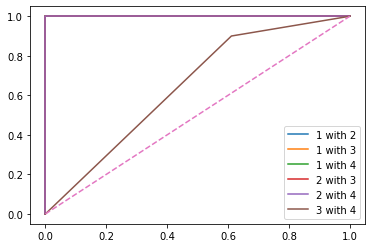

Radial SVM for CN with RU is no longer useless (AUC=0.6444).


In [27]:
x_points=[0,1]
y_points=[0,1]

PairwiseROC(1,2,Testing_rbf_c2)
PairwiseROC(1,3,Testing_rbf_c2)
PairwiseROC(1,4,Testing_rbf_c2)
PairwiseROC(2,3,Testing_rbf_c2)
PairwiseROC(2,4,Testing_rbf_c2)
PairwiseROC(3,4,Testing_rbf_c2)
plt.legend()
plt.plot(x_points, y_points, '--')
# plt.savefig("ROC_rbf_c2.jpg", format='jpg', dpi=1200, bbox_inches='tight')
plt.show()


print('Radial SVM for CN with RU is no longer useless (AUC=0.6444).')

Now, we run the code for the regularization parameter $C=50$, which yields the following output:

In [28]:
clf_c3 = OneVsOneClassifier(
         SVC(kernel='rbf', C=50, random_state=0)).fit(X_train, y_train.values.ravel())
y_predict_c3 = clf_c3.predict(X_test)

In [29]:
Testing_rbf_c3 = pd.DataFrame()

Testing_rbf_c3['Truth'] = y_test
Testing_rbf_c3['Predict'] = y_predict_c3
Testing_rbf_c3

,Truth,Predict
141,2,2
142,2,2
274,3,3
60,1,1
303,4,4
...,...,...
166,2,2
281,4,4
366,4,4
230,3,3


In [30]:
len(Testing_rbf_c3.query('Truth==Predict'))

180

In [31]:
print('CN classified as RU:', len(Testing_rbf_c3[(Testing_rbf_c2['Truth']==3) & (Testing_rbf_c3['Predict']==4)]))

print('RU classified as CN:', len(Testing_rbf_c3[(Testing_rbf_c2['Truth']==4) & (Testing_rbf_c3['Predict']==3)]))

CN classified as RU: 5
RU classified as CN: 1


AUC= 1.0
AUC= 1.0
AUC= 1.0
AUC= 1.0
AUC= 1.0
AUC= 0.9412037037037038


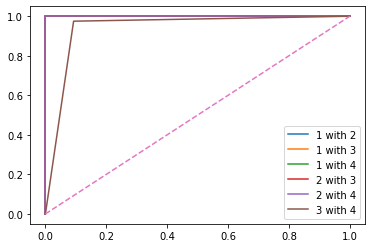

Radial SVM for CN with RU is now excellent (AUC=0.94)!


In [32]:
x_points=[0,1]
y_points=[0,1]

PairwiseROC(1,2,Testing_rbf_c3)
PairwiseROC(1,3,Testing_rbf_c3)
PairwiseROC(1,4,Testing_rbf_c3)
PairwiseROC(2,3,Testing_rbf_c3)
PairwiseROC(2,4,Testing_rbf_c3)
PairwiseROC(3,4,Testing_rbf_c3)
plt.legend()
plt.plot(x_points, y_points, '--')
# plt.savefig("ROC_rbf_c3.jpg", format='jpg', dpi=1200, bbox_inches='tight')
plt.show()

print('Radial SVM for CN with RU is now excellent (AUC=0.94)!')

Finally, we run the code for the regularization parameter $C=100$, which yields the following output:

In [33]:
clf_c4 = OneVsOneClassifier(
         SVC(kernel='rbf', C=100, random_state=0)).fit(X_train, y_train.values.ravel())
y_predict_c4 = clf_c4.predict(X_test)

In [34]:
Testing_rbf_c4 = pd.DataFrame()

Testing_rbf_c4['Truth'] = y_test
Testing_rbf_c4['Predict'] = y_predict_c4
Testing_rbf_c4

,Truth,Predict
141,2,2
142,2,2
274,3,3
60,1,1
303,4,4
...,...,...
166,2,2
281,4,4
366,4,4
230,3,3


In [35]:
len(Testing_rbf_c4.query('Truth==Predict'))

182

In [36]:
print('CN classified as RU:', len(Testing_rbf_c2[(Testing_rbf_c4['Truth']==3) & (Testing_rbf_c4['Predict']==4)]))

print('RU classified as CN:', len(Testing_rbf_c2[(Testing_rbf_c4['Truth']==4) & (Testing_rbf_c4['Predict']==3)]))

CN classified as RU: 1
RU classified as CN: 3


AUC= 1.0
AUC= 1.0
AUC= 1.0
AUC= 1.0
AUC= 1.0
AUC= 0.9532407407407408


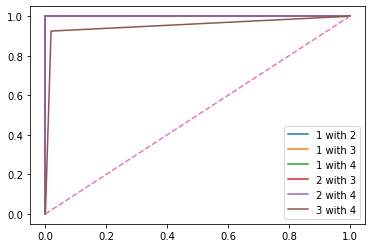

Radial SVM for CN with RU is now excellent (AUC=0.95)!


In [37]:
x_points=[0,1]
y_points=[0,1]

PairwiseROC(1,2,Testing_rbf_c4)
PairwiseROC(1,3,Testing_rbf_c4)
PairwiseROC(1,4,Testing_rbf_c4)
PairwiseROC(2,3,Testing_rbf_c4)
PairwiseROC(2,4,Testing_rbf_c4)
PairwiseROC(3,4,Testing_rbf_c4)
plt.legend()
plt.plot(x_points, y_points, '--')
# plt.savefig("ROC_rbf_c4.jpg", format='jpg', dpi=1200, bbox_inches='tight')
plt.show()

print('Radial SVM for CN with RU is now excellent (AUC=0.95)!')

## Polynomial Kernel SVM:

In [38]:
## Polynomial kernel Support Vector Machine:

clf3 = OneVsOneClassifier(
         SVC(kernel='poly', random_state=0)).fit(X_train, y_train.values.ravel())
y_predict = clf3.predict(X_test)

In [39]:
Testing_poly = pd.DataFrame()

Testing_poly['Truth'] = y_test
Testing_poly['Predict'] = y_predict
Testing_poly

,Truth,Predict
141,2,2
142,2,2
274,3,3
60,1,1
303,4,4
...,...,...
166,2,2
281,4,4
366,4,4
230,3,4


In [40]:
len(Testing_poly.query('Truth==Predict'))

143

In [41]:
print('Misclass(RU,CN)=', len(Testing_poly[(Testing_poly['Truth']==3) & (Testing_poly['Predict']==4)]))

print('CN Truth=', len(Testing_poly[(Testing_poly['Truth']==3)]))

print('Not all China data is misclassified as Russia! But all misclassification comes from China!')

Misclass(RU,CN)= 43
CN Truth= 54
Not all China data is misclassified as Russia! But all misclassification comes from China!


AUC= 1.0
AUC= 1.0
AUC= 1.0
AUC= 1.0
AUC= 1.0
AUC= 0.6018518518518519


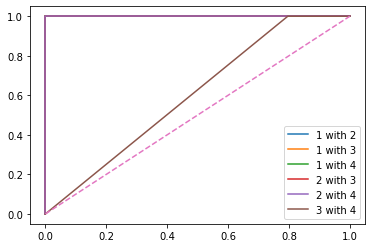

In [42]:
x_points=[0,1]
y_points=[0,1]

PairwiseROC(1,2,Testing_poly)
PairwiseROC(1,3,Testing_poly)
PairwiseROC(1,4,Testing_poly)
PairwiseROC(2,3,Testing_poly)
PairwiseROC(2,4,Testing_poly)
PairwiseROC(3,4,Testing_poly)
plt.legend()
plt.plot(x_points, y_points, '--')
# plt.savefig("ROC_poly.jpg", format='jpg', dpi=1200, bbox_inches='tight')
plt.show()

Now that we have run the Polynomial Kernel SVM for the default regularization parameter value *C*, we now check whether the ROC and AUC curves show a classification improvement if we change the regularization parameter value. For this, we take $C=0.1, 10, 50, \text{ and } 100$, and run the radial kernel classification for these values of *C*. 

In [43]:
clf3_c1 = OneVsOneClassifier(
         SVC(kernel='poly', C=0.1, random_state=0)).fit(X_train, y_train.values.ravel())
y_predict_c1 = clf3_c1.predict(X_test)

In [44]:
Testing_poly_c1 = pd.DataFrame()

Testing_poly_c1['Truth'] = y_test
Testing_poly_c1['Predict'] = y_predict_c1
Testing_poly_c1

,Truth,Predict
141,2,2
142,2,2
274,3,4
60,1,1
303,4,4
...,...,...
166,2,2
281,4,4
366,4,4
230,3,4


In [45]:
len(Testing_poly_c1.query('Truth==Predict'))

132

In [46]:
print('CN classified as RU:', len(Testing_poly_c1[(Testing_poly_c1['Truth']==3) & (Testing_poly_c1['Predict']==4)]))

print('RU classified as CN:', len(Testing_poly_c1[(Testing_rbf_c2['Truth']==4) & (Testing_poly_c1['Predict']==3)]))


CN classified as RU: 54
RU classified as CN: 0


AUC= 1.0
AUC= nan
AUC= 1.0
AUC= nan
AUC= 1.0
AUC= 0.5


C:\Users\Andre\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Andre\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


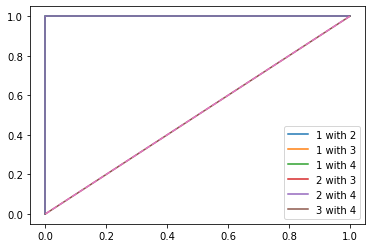

Polynomial SVM for CN with RU is now useless (AUC=0.5) for C=0.1.


In [47]:
x_points=[0,1]
y_points=[0,1]

PairwiseROC(1,2,Testing_poly_c1)
PairwiseROC(1,3,Testing_poly_c1)
PairwiseROC(1,4,Testing_poly_c1)
PairwiseROC(2,3,Testing_poly_c1)
PairwiseROC(2,4,Testing_poly_c1)
PairwiseROC(3,4,Testing_poly_c1)
plt.legend()
plt.plot(x_points, y_points, '--')
# plt.savefig("ROC_poly_c1.jpg", format='jpg', dpi=1200, bbox_inches='tight')
plt.show()

print('Polynomial SVM for CN with RU is now useless (AUC=0.5) for C=0.1.')

As can be seen, setting a regularization parameter value $C=0.1$ makes the polynomial kernel SVM become useless for CN/RU classification ($AUC=0.5$). Hence, we now run the code for the regularization parameter value $C=10$. 

In [48]:
clf3_c2 = OneVsOneClassifier(
         SVC(kernel='poly', C=10, random_state=0)).fit(X_train, y_train.values.ravel())
y_predict_c2 = clf3_c2.predict(X_test)

In [49]:
Testing_poly_c2 = pd.DataFrame()

Testing_poly_c2['Truth'] = y_test
Testing_poly_c2['Predict'] = y_predict_c2
Testing_poly_c2

,Truth,Predict
141,2,2
142,2,2
274,3,3
60,1,1
303,4,4
...,...,...
166,2,2
281,4,4
366,4,4
230,3,4


In [50]:
len(Testing_poly_c2.query('Truth==Predict'))

153

In [51]:
print('CN classified as RU:', len(Testing_poly_c2[(Testing_poly_c1['Truth']==3) & (Testing_poly_c2['Predict']==4)]))

print('RU classified as CN:', len(Testing_poly_c2[(Testing_rbf_c2['Truth']==4) & (Testing_poly_c2['Predict']==3)]))

CN classified as RU: 33
RU classified as CN: 0


AUC= 1.0
AUC= 1.0
AUC= 1.0
AUC= 1.0
AUC= 1.0
AUC= 0.6944444444444444


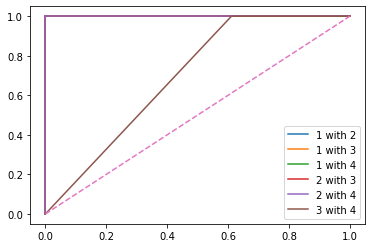

In [52]:
x_points=[0,1]
y_points=[0,1]

PairwiseROC(1,2,Testing_poly_c2)
PairwiseROC(1,3,Testing_poly_c2)
PairwiseROC(1,4,Testing_poly_c2)
PairwiseROC(2,3,Testing_poly_c2)
PairwiseROC(2,4,Testing_poly_c2)
PairwiseROC(3,4,Testing_poly_c2)
plt.legend()
plt.plot(x_points, y_points, '--')
# plt.savefig("ROC_poly_c2.jpg", format='jpg', dpi=1200, bbox_inches='tight')
plt.show()


Now, we run the code for the regularization parameter $C=50$, which yields the following output:

In [53]:
clf3_c3 = OneVsOneClassifier(
         SVC(kernel='poly', C=50, random_state=0)).fit(X_train, y_train.values.ravel())
y_predict_c3 = clf3_c3.predict(X_test)

In [54]:
Testing_poly_c3 = pd.DataFrame()

Testing_poly_c3['Truth'] = y_test
Testing_poly_c3['Predict'] = y_predict_c3
Testing_poly_c3

,Truth,Predict
141,2,2
142,2,2
274,3,3
60,1,1
303,4,4
...,...,...
166,2,2
281,4,4
366,4,4
230,3,4


In [55]:
len(Testing_poly_c3.query('Truth==Predict'))

153

In [56]:
print('CN classified as RU:', len(Testing_poly_c3[(Testing_poly_c3['Truth']==3) & (Testing_poly_c3['Predict']==4)]))

print('RU classified as CN:', len(Testing_poly_c3[(Testing_rbf_c3['Truth']==4) & (Testing_poly_c3['Predict']==3)]))

CN classified as RU: 33
RU classified as CN: 0


AUC= 1.0
AUC= 1.0
AUC= 1.0
AUC= 1.0
AUC= 1.0
AUC= 0.6944444444444444


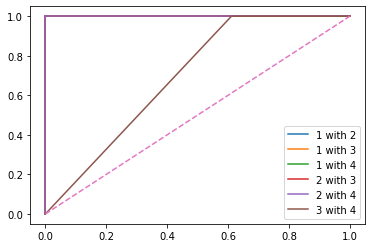

In [57]:
x_points=[0,1]
y_points=[0,1]

PairwiseROC(1,2,Testing_poly_c3)
PairwiseROC(1,3,Testing_poly_c3)
PairwiseROC(1,4,Testing_poly_c3)
PairwiseROC(2,3,Testing_poly_c3)
PairwiseROC(2,4,Testing_poly_c3)
PairwiseROC(3,4,Testing_poly_c3)
plt.legend()
plt.plot(x_points, y_points, '--')
# plt.savefig("ROC_poly_c3.jpg", format='jpg', dpi=1200, bbox_inches='tight')
plt.show()


As can be seen, the AUC is the same for $C=50$ as it is for $C=10$, which is somewhat surprising. 

Finally, running the code for $C=100$, we obtain the following output:

In [58]:
clf3_c4 = OneVsOneClassifier(
         SVC(kernel='poly', C=100, random_state=0)).fit(X_train, y_train.values.ravel())
y_predict_c4 = clf3_c4.predict(X_test)

In [59]:
Testing_poly_c4 = pd.DataFrame()

Testing_poly_c4['Truth'] = y_test
Testing_poly_c4['Predict'] = y_predict_c4
Testing_poly_c4

,Truth,Predict
141,2,2
142,2,2
274,3,3
60,1,1
303,4,4
...,...,...
166,2,2
281,4,4
366,4,4
230,3,3


In [60]:
len(Testing_poly_c4.query('Truth==Predict'))

170

In [61]:
print('CN classified as RU:', len(Testing_poly_c4[(Testing_poly_c1['Truth']==3) & (Testing_poly_c4['Predict']==4)]))

print('RU classified as CN:', len(Testing_poly_c4[(Testing_rbf_c2['Truth']==4) & (Testing_poly_c4['Predict']==3)]))

CN classified as RU: 16
RU classified as CN: 0


AUC= 1.0
AUC= 1.0
AUC= 1.0
AUC= 1.0
AUC= 1.0
AUC= 0.8518518518518519


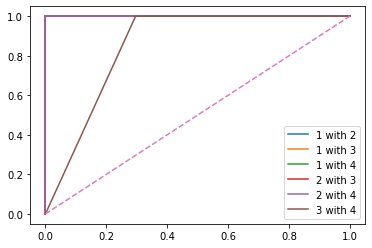

In [62]:
x_points=[0,1]
y_points=[0,1]

PairwiseROC(1,2,Testing_poly_c4)
PairwiseROC(1,3,Testing_poly_c4)
PairwiseROC(1,4,Testing_poly_c4)
PairwiseROC(2,3,Testing_poly_c4)
PairwiseROC(2,4,Testing_poly_c4)
PairwiseROC(3,4,Testing_poly_c4)
plt.legend()
plt.plot(x_points, y_points, '--')
# plt.savefig("ROC_poly_c4.jpg", format='jpg', dpi=1200, bbox_inches='tight')
plt.show()


## Linear SVM:

In [63]:
## Linear SVM:

clf4 = OneVsOneClassifier(
         SVC(kernel='linear', random_state=0)).fit(X_train, y_train.values.ravel())
y_predict = clf4.predict(X_test)

In [64]:
Testing_linear = pd.DataFrame()

Testing_linear['Truth'] = y_test
Testing_linear['Predict'] = y_predict
Testing_linear

,Truth,Predict
141,2,2
142,2,2
274,3,3
60,1,1
303,4,4
...,...,...
166,2,2
281,4,3
366,4,4
230,3,3


In [65]:
print('Correct Predictions:', len(Testing_linear.query('Truth==Predict')))

print('Misclass(RU,CN)=', len(Testing_linear[(Testing_linear['Truth']==4) & (Testing_linear['Predict']==3)]))

print('RU Truth=', len(Testing_linear[(Testing_linear['Truth']==4)]))

print('Unlike rbf and poly SVM, here Russia is misclassified as China. Fit is acceptably good though.')

Correct Predictions: 176
Misclass(RU,CN)= 10
RU Truth= 40
Unlike rbf and poly SVM, here Russia is misclassified as China. Fit is acceptably good though.


AUC= 1.0
AUC= 1.0
AUC= 1.0
AUC= 1.0
AUC= 1.0
AUC= 0.875


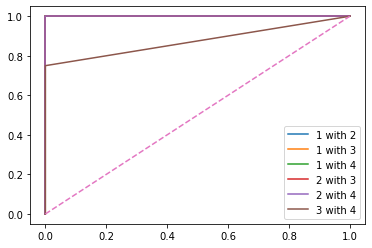

In [66]:
x_points=[0,1]
y_points=[0,1]

PairwiseROC(1,2,Testing_linear)
PairwiseROC(1,3,Testing_linear)
PairwiseROC(1,4,Testing_linear)
PairwiseROC(2,3,Testing_linear)
PairwiseROC(2,4,Testing_linear)
PairwiseROC(3,4,Testing_linear)
plt.legend()
plt.plot(x_points, y_points, '--')
plt.savefig("ROC_linear.jpg", format='jpg', dpi=1200, bbox_inches='tight')
plt.show()